<a href="https://colab.research.google.com/github/PadmarajBhat/Machine-Learning/blob/master/BrainTumorClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detection of 3 Brain Tumors (Meningioma, Glioma and Pituitiary) in T1-weighted contrast enhanced images

### - Revisitng the Udacity Capstone Project in pursuit of better accuracy



# Import Packages
* read the input MRI images (.mat) files through ***h5py***
* ***pandas*** for data analysis and preprocessing
* ***tensorflow*** for modelling and predicting

In [0]:
import os
import zipfile
import h5py
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

# Load Data
* Mount Google Drive
* Unzip it in colab disk
* load mat attributes to list of tuples
* create a panda dataframe for analysis

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!ls /content/drive/'My Drive'/1512427

brainTumorDataPublic_1533-2298.zip  brainTumorDataPublic_767-1532.zip
brainTumorDataPublic_1-766.zip	    cvind.mat
brainTumorDataPublic_2299-3064.zip  README.txt


In [4]:
!ls /content/drive/'My Drive'/1512427/brainTumorDataPublic_1-766.zip

'/content/drive/My Drive/1512427/brainTumorDataPublic_1-766.zip'


In [0]:
def return_imageInfo_from_mat_file(file_name):
    f = h5py.File(file_name,'r')
    return np.array(f['cjdata']['PID'],dtype=np.int)[0][0] \
            , np.array(f['cjdata']['image'],dtype=np.float) \
            , np.array(f['cjdata']['label'], dtype=np.int)[0][0] \
    



49 (512, 512) 474.5963554382324 1
Image Class :  meningioma


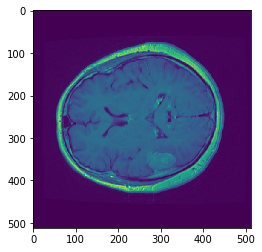

49 (512, 512) 485.6772804260254 1
Image Class :  meningioma


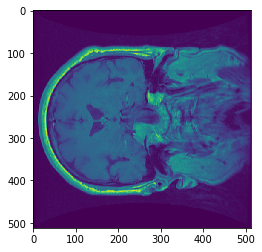

49 (512, 512) 383.9102210998535 1
Image Class :  meningioma


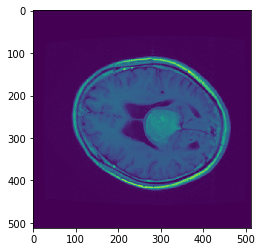

49 (512, 512) 329.3375587463379 1
Image Class :  meningioma


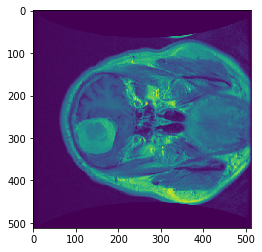

49 (512, 512) 226.69710540771484 1
Image Class :  meningioma


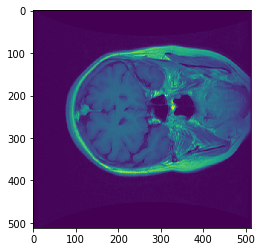

49 (512, 512) 481.8522148132324 1
Image Class :  meningioma


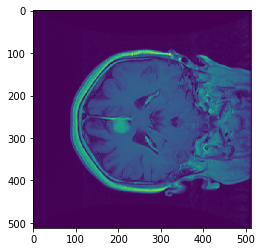

57 (512, 512) 430.3046646118164 1
Image Class :  meningioma


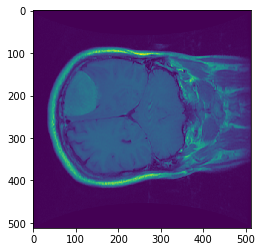

57 (512, 512) 333.2928009033203 1
Image Class :  meningioma


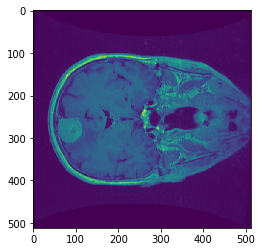

49 (512, 512) 468.2267761230469 1
Image Class :  meningioma


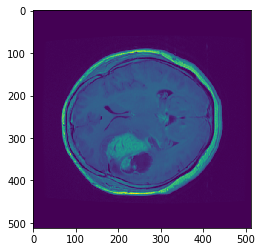

49 (512, 512) 460.45559310913086 1
Image Class :  meningioma


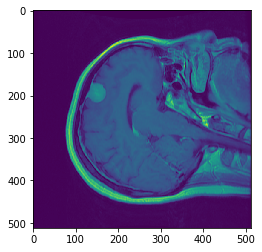

49 (512, 512) 433.2152442932129 1
Image Class :  meningioma


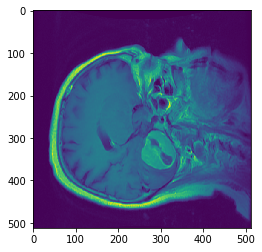

49 (512, 512) 538.9249000549316 1
Image Class :  meningioma


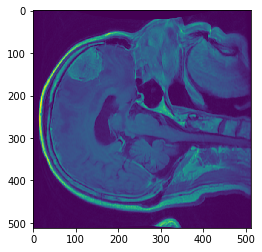

49 (512, 512) 147.875 1
Image Class :  meningioma


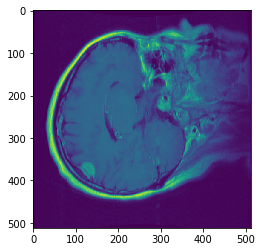

57 (512, 512) 387.9222221374512 1
Image Class :  meningioma


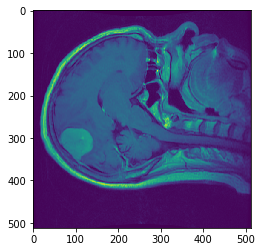

49 (512, 512) 529.4785079956055 2
Image Class :  glioma


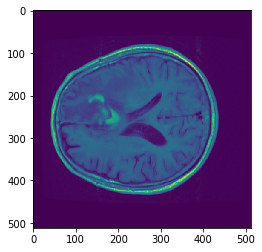

49 (512, 512) 491.5796241760254 2
Image Class :  glioma


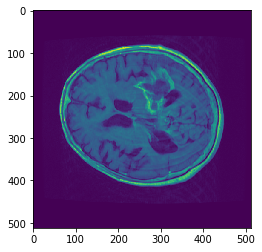

49 (512, 512) 467.09925079345703 2
Image Class :  glioma


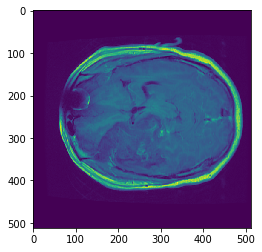

49 (512, 512) 115.62479019165039 3
Image Class :  pituitary


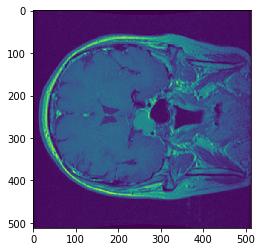

57 (512, 512) 542.0734062194824 3
Image Class :  pituitary


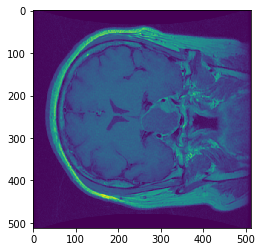

57 (512, 512) 436.6025733947754 3
Image Class :  pituitary


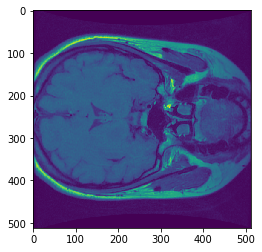

57 (512, 512) 556.898021697998 3
Image Class :  pituitary


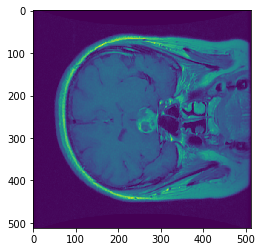

49 (512, 512) 157.4056854248047 3
Image Class :  pituitary


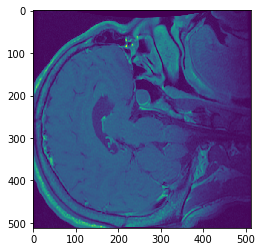

57 (512, 512) 362.1022415161133 3
Image Class :  pituitary


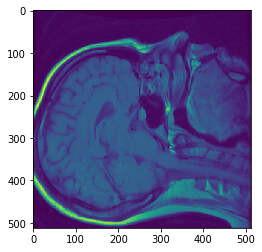

77 (512, 512) 736.0666198730469 2
Image Class :  glioma


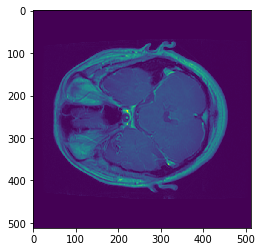

77 (512, 512) 559.5044784545898 2
Image Class :  glioma


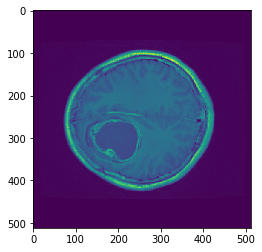

77 (512, 512) 610.5562133789062 2
Image Class :  glioma


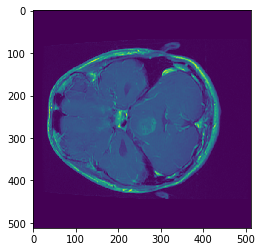

77 (512, 512) 683.804313659668 2
Image Class :  glioma


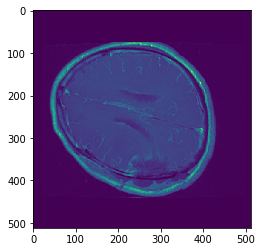

77 (512, 512) 466.32925033569336 2
Image Class :  glioma


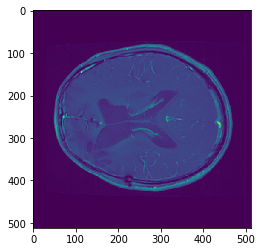

77 (512, 512) 588.7466430664062 2
Image Class :  glioma


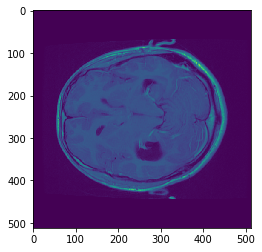

77 (512, 512) 502.59008026123047 2
Image Class :  glioma


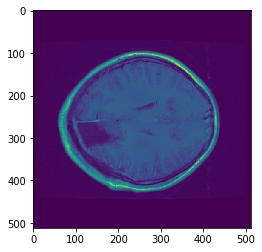

77 (512, 512) 478.2446594238281 2
Image Class :  glioma


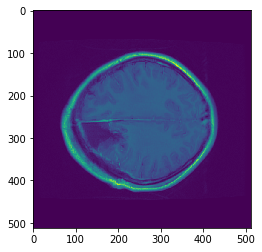

77 (512, 512) 243.74362564086914 2
Image Class :  glioma


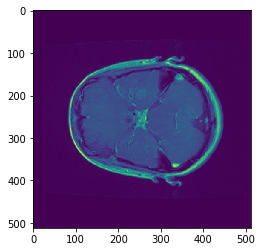

77 (512, 512) 699.9077186584473 2
Image Class :  glioma


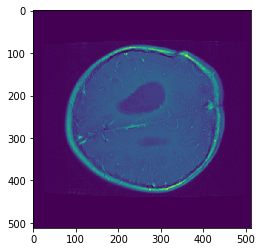

77 (512, 512) 844.6947402954102 2
Image Class :  glioma


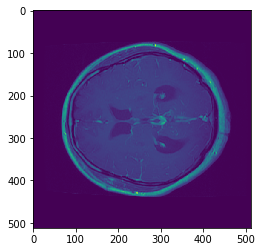

77 (512, 512) 936.0986747741699 2
Image Class :  glioma


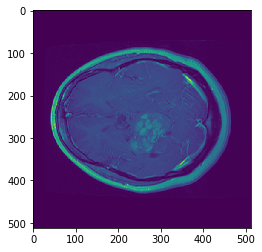

77 (512, 512) 743.1911315917969 2
Image Class :  glioma


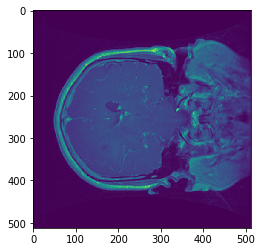

77 (512, 512) 623.8679237365723 2
Image Class :  glioma


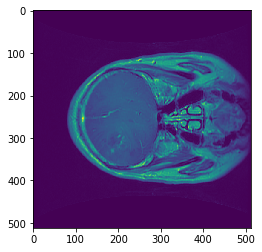

77 (512, 512) 646.7598419189453 2
Image Class :  glioma


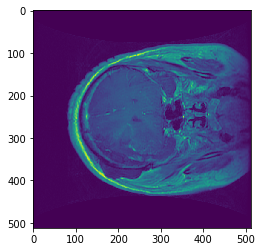

77 (512, 512) 264.5539741516113 2
Image Class :  glioma


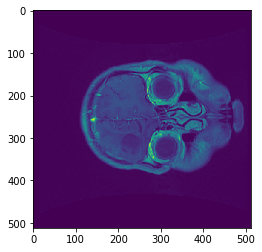

77 (512, 512) 847.0034027099609 2
Image Class :  glioma


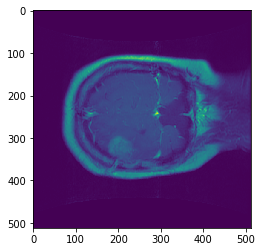

77 (512, 512) 647.1603317260742 2
Image Class :  glioma


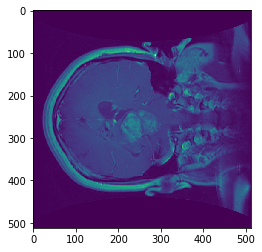

77 (512, 512) 899.1423110961914 2
Image Class :  glioma


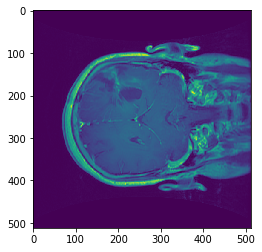

77 (512, 512) 774.561954498291 2
Image Class :  glioma


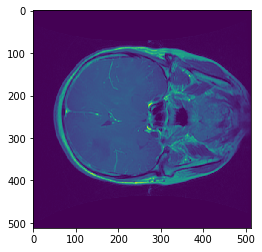

77 (512, 512) 934.2977256774902 2
Image Class :  glioma


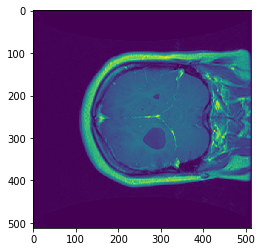

77 (512, 512) 640.3899192810059 2
Image Class :  glioma


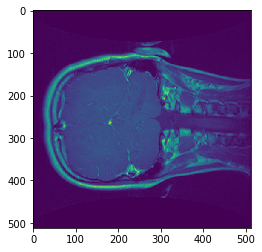

77 (512, 512) 927.5541038513184 2
Image Class :  glioma


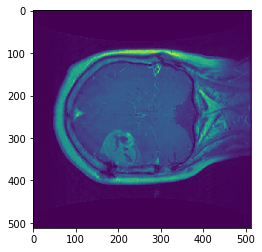

77 (512, 512) 906.6886024475098 2
Image Class :  glioma


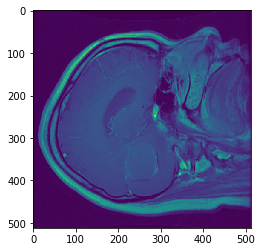

77 (512, 512) 576.475399017334 2
Image Class :  glioma


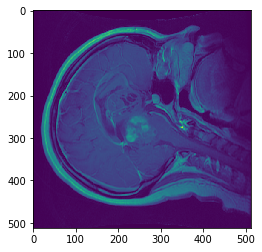

77 (512, 512) 848.9324226379395 2
Image Class :  glioma


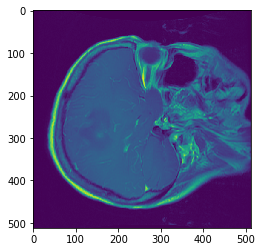

77 (512, 512) 381.5372123718262 2
Image Class :  glioma


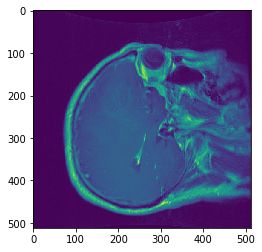

77 (512, 512) 493.3640785217285 2
Image Class :  glioma


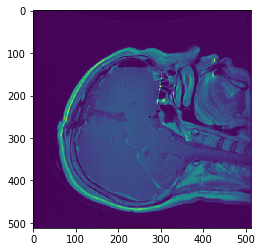

77 (512, 512) 657.1761322021484 2
Image Class :  glioma


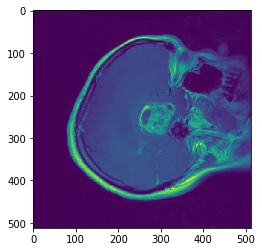

77 (512, 512) 360.4306182861328 2
Image Class :  glioma


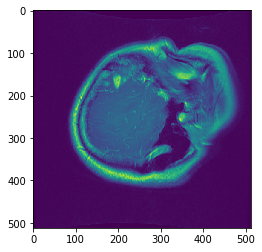

49 (512, 512) 784.9757957458496 3
Image Class :  pituitary


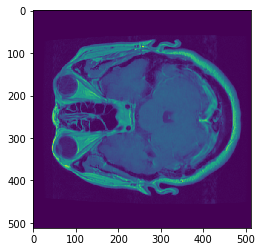

49 (512, 512) 497.72509002685547 3
Image Class :  pituitary


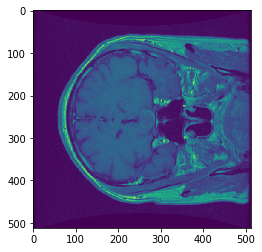

49 (512, 512) 468.52197647094727 3
Image Class :  pituitary


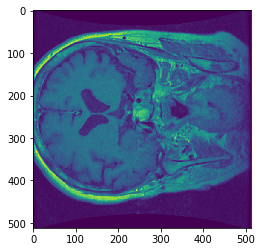

49 (512, 512) 518.4082260131836 3
Image Class :  pituitary


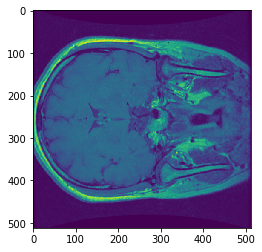

49 (512, 512) 135.48566055297852 3
Image Class :  pituitary


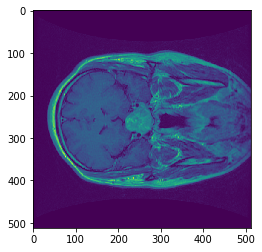

49 (512, 512) 164.87049102783203 3
Image Class :  pituitary


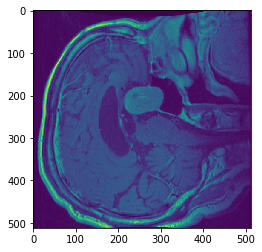

49 (512, 512) 174.06655502319336 3
Image Class :  pituitary


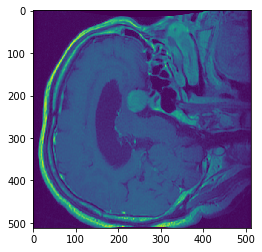

49 (512, 512) 153.14424896240234 3
Image Class :  pituitary


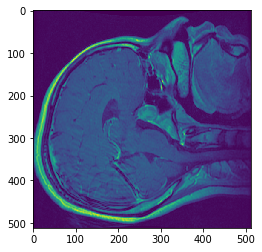

49 (512, 512) 817.82421875 3
Image Class :  pituitary


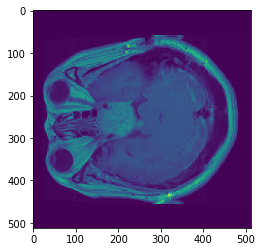

57 (512, 512) 181.54907608032227 3
Image Class :  pituitary


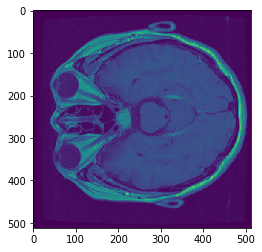

57 (512, 512) 214.78147888183594 3
Image Class :  pituitary


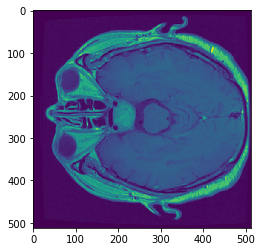

49 (512, 512) 340.4270133972168 3
Image Class :  pituitary


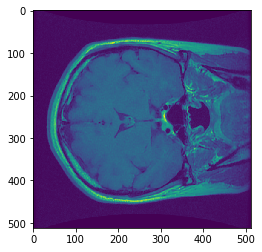

49 (512, 512) 124.10214614868164 3
Image Class :  pituitary


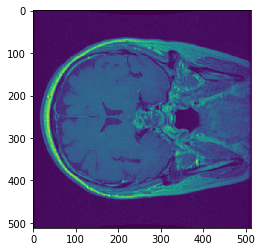

49 (512, 512) 118.4071273803711 3
Image Class :  pituitary


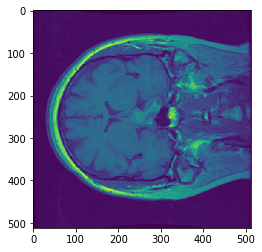

49 (512, 512) 596.854362487793 2
Image Class :  glioma


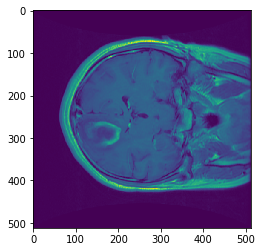

56 (512, 512) 354.12726974487305 2
Image Class :  glioma


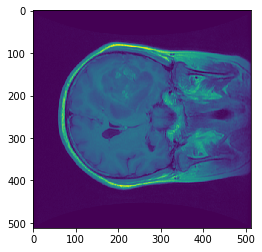

49 (512, 512) 175.20347213745117 2
Image Class :  glioma


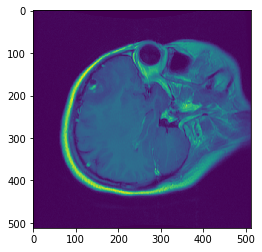

49 (512, 512) 417.78857803344727 2
Image Class :  glioma


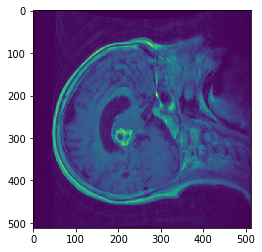

49 (512, 512) 163.1489715576172 3
Image Class :  pituitary


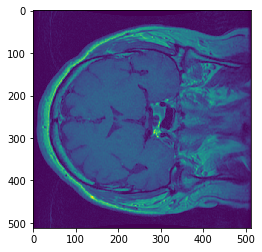

49 (512, 512) 152.89459609985352 3
Image Class :  pituitary


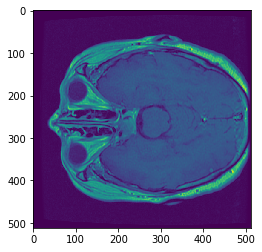

In [44]:
names = ["","meningioma","glioma","pituitary"]
patients_details = []
for root, dirs, files in os.walk("/content/drive/My Drive/1512427/", topdown = False):
   #print(root,dirs,files)
   for f in files:
     if ".zip" in f:
        file = zipfile.ZipFile(root+f, "r")
        for name in file.namelist():
          data = file.read(name)
          #print (name, len(data), repr(data[:10]))
          file.extract(name,".")
          image_info = return_imageInfo_from_mat_file(name)
          
          patients_details.append(image_info)
          #print(return_imageInfo_from_mat_file(name))
          if np.random.randint(1000) < np.random.randint(50):
            print(image_info[0], image_info[1].shape,np.mean(image_info[1]), image_info[2])
            print( "Image Class : ", names[image_info[2]])
            try:
              plt.imshow( image_info[1])
              plt.show()
            except:
              print("Empty Array")
          
         #break
        #break


In [45]:
df = pd.DataFrame(patients_details,columns=["pid","image_data","label"])
df

pid                                         image_data  label
0      49  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      1
1      49  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      1
2      49  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      1
3      49  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      1
4      49  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      1
5      49  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      1
6      49  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      1
7      49  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      1
8      49  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      1
9      49  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      1
10     49  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      1
11     49  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      1
12     49  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      1
13     49  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      1
14     49  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      1
15     49  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      1
16     49  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      1
17     49  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      1
18     49  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      1
19     49  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      1
20     49  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      1
21     49  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      1
22     49  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      1
23     49  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      1
24     49  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      1
25     49  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      1
26     49  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      1
27     49  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      1
28     49  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      1
29     49  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      1
...   ...                                                ...    ...
3034   49  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      3
3035   49  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      3
3036   49  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      3
3037   49  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      3
3038   49  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      3
3039   49  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      3
3040   49  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      3
3041   49  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      3
3042   49  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      3
3043   49  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      3
3044   49  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      3
3045   49  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      3
3046   49  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      3
3047   49  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      3
3048   49  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      3
3049   49  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      3
3050   49  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      3
3051   49  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      3
3052   49  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      3
3053   49  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      3
3054   49  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      3
3055   49  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      3
3056   49  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      3
3057   49  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      3
3058   49  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      3
3059   49  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      3
3060   49  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  

In [46]:
df.pid.unique()

array([49, 57, 53, 77, 56])

There are only 5 patients info present !!!!

In [48]:
df.groupby("pid").agg("count")

image_data  label
pid                   
49         1427   1427
53            2      2
56           13     13
57          401    401
77         1221   1221

In [51]:
df.groupby(["pid","label"]).agg("count").reset_index()

pid  label  image_data
0    49      1         584
1    49      2         126
2    49      3         717
3    53      1           1
4    53      3           1
5    56      1           1
6    56      2          12
7    57      1         122
8    57      2          67
9    57      3         212
10   77      2        1221

In [50]:
df.groupby("label").agg("count")

pid  image_data
label                  
1       708         708
2      1426        1426
3       930         930

Preprocessing ideas:

1.  Dataset has tumor region indicator which would allow us to get the average brightness of the area.

2. It is said that brightest region is skull and skull is not important for the tumor detection. It is only brain position determines the tumor class. If we remove skull remaining image is brain ?

3. if we start with a window of image which would maximize the presence of tumor and expand to include some brain region around the tumor then i guess it is the best data for training(and predicting). Because tumor position in brain is THE factor that decides the tumor class.